# Exploring the Relationship Between GDP and Life Expectancy

## Introduction
This data science project investigates the potential relationship between a country's economic performance and the life expectancy of its population. By analyzing historical GDP and life expectancy data from six selected nations, the goal is to uncover trends, patterns, and correlations that shed light on how economic growth might influence public health and longevity.

The project will involve cleaning and preparing the data, performing exploratory data analysis, visualizing key metrics, and interpreting the results to draw meaningful conclusions.

**Key Questions**
* How has life expectancy changed over time in each of the six nations?
* What are the GDP growth trends in these countries over the same period?
* Is there a significant correlation between a country’s GDP and its average life expectancy?
* What are the average life expectancies across the nations?
* How is life expectancy distributed within and across countries?

**Data Sources**
* GDP Data: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) and OECD National Accounts data
* Life Expectancy Data: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

**Methodology**
The analysis will be conducted using Python, with a focus on the following tasks:

* Data acquisition and cleaning: Import and clean datasets from the World Bank and WHO.
* Data exploration and preprocessing: Structure and manipulate the data using pandas for analysis.
* Visualization: Use seaborn and matplotlib to create clear, informative charts and graphs that illustrate trends and relationships.
* Statistical analysis: Apply hypothesis testing and correlation metrics to evaluate the relationship between GDP and life expectancy.

**Expected Outcomes**
* An interactive, visually-rich summary of how life expectancy and GDP have evolved over time for six countries.
* Quantitative evidence of the strength (or lack) of correlation between economic output and health outcomes.
* A narrative-style presentation or blog post that explains the findings in an accessible way, suitable for both technical and non-technical audiences.

**Skills Demonstrated**
* Data wrangling and cleaning with pandas
* Exploratory data analysis and visualization
* Hypothesis testing and statistical correlation
* Communicating data insights through storytelling and visuals

## Import Python Modules

First import the preliminary modules that will be used in this project:

In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading the Data

To begin analysing the data and identifying any relationships between GDP and life expectancy **all_data.csv** is read into a DataFrame named `df`.

In [7]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


To allow for greater awareness of the data I have displayed it's shape.

In [8]:
df.shape

(96, 4)

The dataset has 96 rows and four columns.

* Country - nation
* Year - the year for the observation
* Life expectancy at birth (years) - life expectancy value in years
* GDP - Gross Domestic Product in U.S. dollars

## Explore the data

First, we can explore which countries are represented in `df`. There are six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [12]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The next step is to find which years are represented in the data, we can see that it spans 2000-2015.

In [13]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Cleaning Column Name

Looking over the data, there are inconsistencies in the column names. The first two column names are one word each, while the third is five words long! `Life expectancy at birth (years)` is very descriptive, which would be good for labeling the axis, however would make things difficult to wrangle when writing code for the plot itself. We can use the `rename` function to change the column name to `LEABY`.

In [18]:
df = df.rename({"Life expectancy at birth (years)": "LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Exploratory Plots

Exploring data through plots is often more effective than investigating the data directly, below the distribution of `GDP` is shown.

We can see that the distribution of `GDP` in the data is very right skewed where most of the values are on the left-hand side. This type of distribution could be described as a power law distribution. More about the power law can be read [here](https://en.wikipedia.org/wiki/Power_law). 

/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


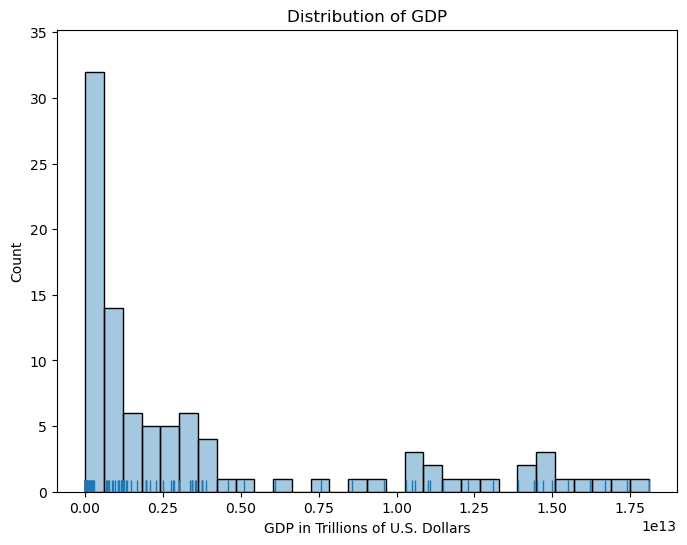

In [83]:
plt.figure(figsize = (8,6))
sns.histplot(df, x = "GDP", bins = 30, alpha = 0.4)
sns.rugplot(df, x = "GDP")
plt.title("Distribution of GDP")
plt.xlabel("GDP in Trillions of U.S. Dollars");

Next we have plotted the distribution of `LEABY`. The distribution of `LEABY` in the data is very left skewed with most of the values collected on the right-hand side. This is almost the opposite of that observed in the `GDP` column. A more granular investigation may also reveal different modes or smaller groupings of distributions within this range.

/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


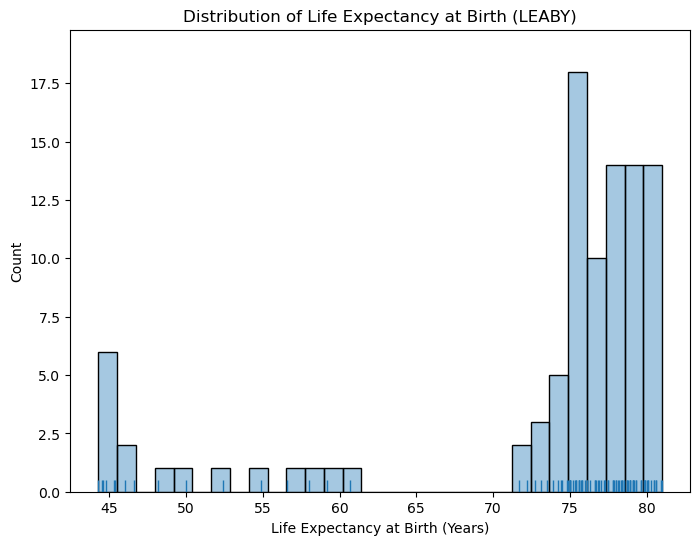

In [ ]:
plt.figure(figsize = (8,6))
sns.histplot(df, x = "LEABY", bins = 30, alpha = 0.4)
sns.rugplot(df, x = "LEABY")
plt.title("Distribution of Life Expectancy at Birth (LEABY)")
plt.xlabel("Life Expectancy at Birth (Years)");

The plots above did not display the data separated by countries, so we will now determine the average `LEABY` and `GDP` by country.

In [44]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(dfMeans)

                    Country     LEABY           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


We have now broken the data down by `Country` and calculated the average values for `LEABY` and `GDP`.

Below the mean values for each of these variables have been plotted as bar charts.

This plot shows the Average Life Expectancy by Country. All of the countries except for Zimbabwe have an average life expectancy in the high 70s. This could potentially explain the skew in the `LEABY` distribution from above.

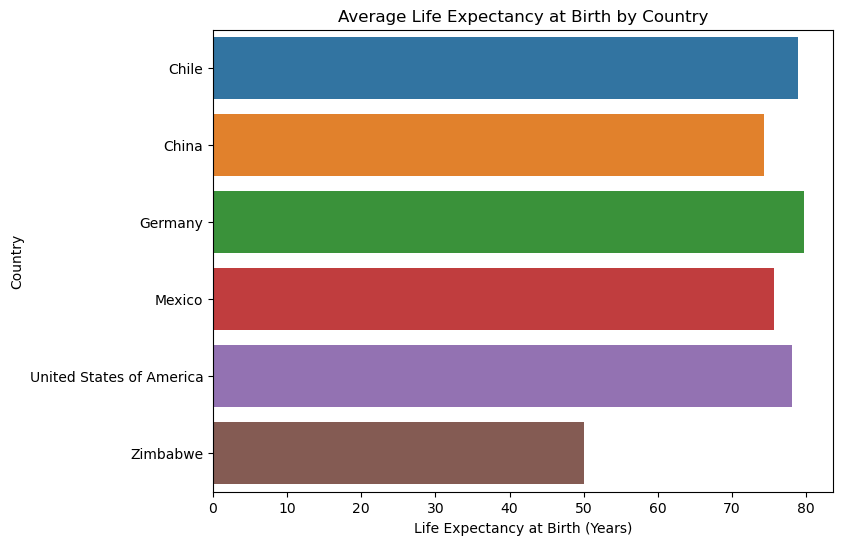

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(data=dfMeans, x="LEABY", y="Country")
plt.title("Average Life Expectancy at Birth by Country")
plt.xlabel("Life Expectancy at Birth (Years)")
plt.ylabel("Country");

This plot shows the Average `GDP` by `Country`. We can see that the US has a much higher `GDP` value compared with the rest. Within this scale the `GDP` of Zimbabwe is not visible while Chile can only barely be seen. China, Germany and Mexico seems to have relatively close figures.

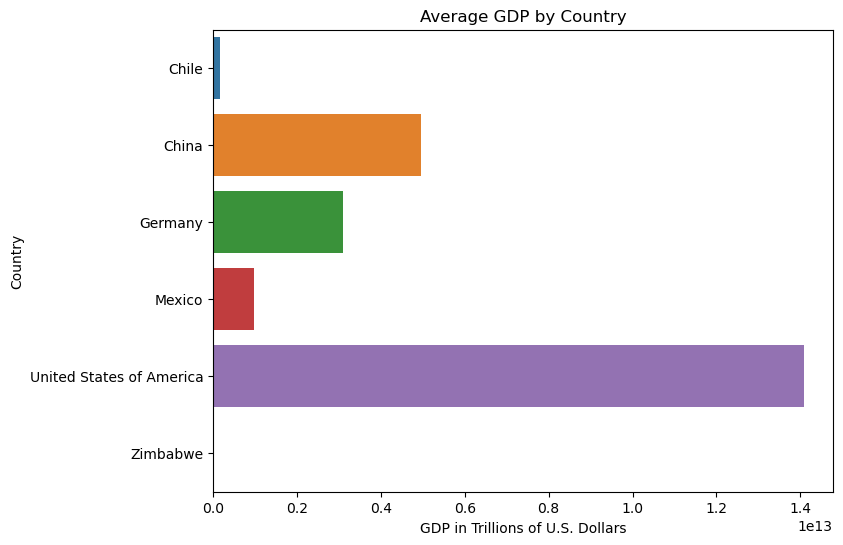

In [ ]:
plt.figure(figsize = (8, 6))
sns.barplot(data = dfMeans, x = "GDP", y = "Country")
plt.title("Average GDP by Country")
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.ylabel("Country");

#### Violin Plots

An alternative way to compare data is to visualise the distributions of each and look for patterns in the shapes.

Here we will use a violin plot to show the shape of the distribution compared to the box plot. Below, the country is on the x-axis and the distribution of `GDP` and `LEABY` are on the y axis.

In the `GDP` plot on the left, China and the US have a relatively wide range, while Zimbabwe, Chile and Mexico have shorter ranges.

In the `LEABY` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

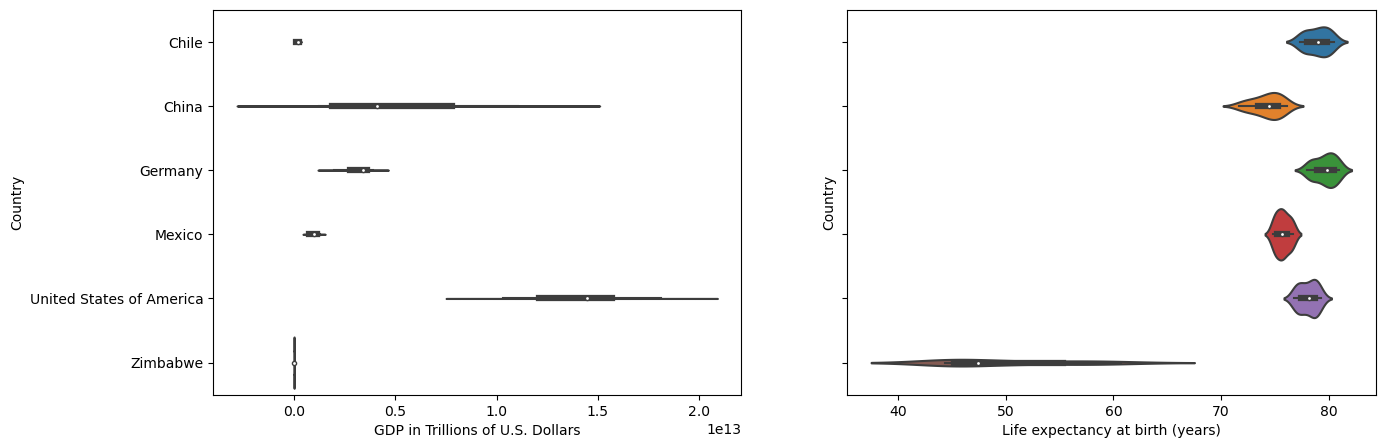

In [81]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 5))
axes[0] = sns.violinplot(ax = axes[0], x = df.GDP, y = df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax = axes[1], x = df.LEABY, y = df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

#### Swarm Plots

In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would have been lost in the box plot, unless the reader is very adept at data visualizations. 

Another alternative way to show distributions is through a swarm plot, they can be used in addition to box and violin plots.

Below we have shown the swarm plot on its own followed by the swarm plot overlayed on top of the violin plots from above. Swarm plots allow us to see both the dot density around values but also the distribution through the area and shape.

/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating i

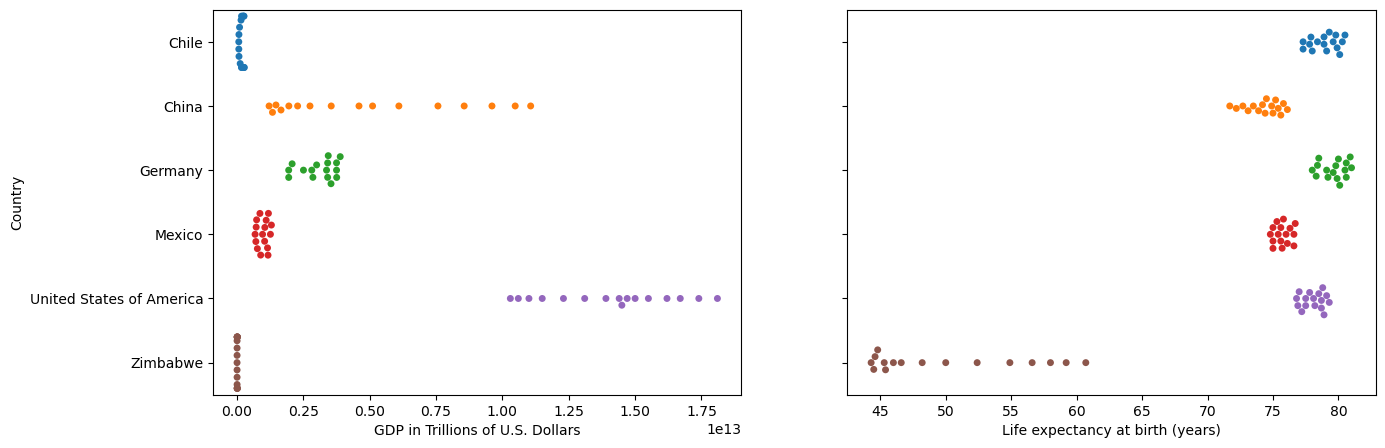

In [82]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 5))
axes[0] = sns.swarmplot(ax = axes[0], x = df.GDP, y = df.Country, hue = df.Country, legend = False)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax = axes[1], x = df.LEABY, y = df.Country, hue = df.Country, legend = False)
axes[1].set_xlabel("Life expectancy at birth (years)");

/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating i

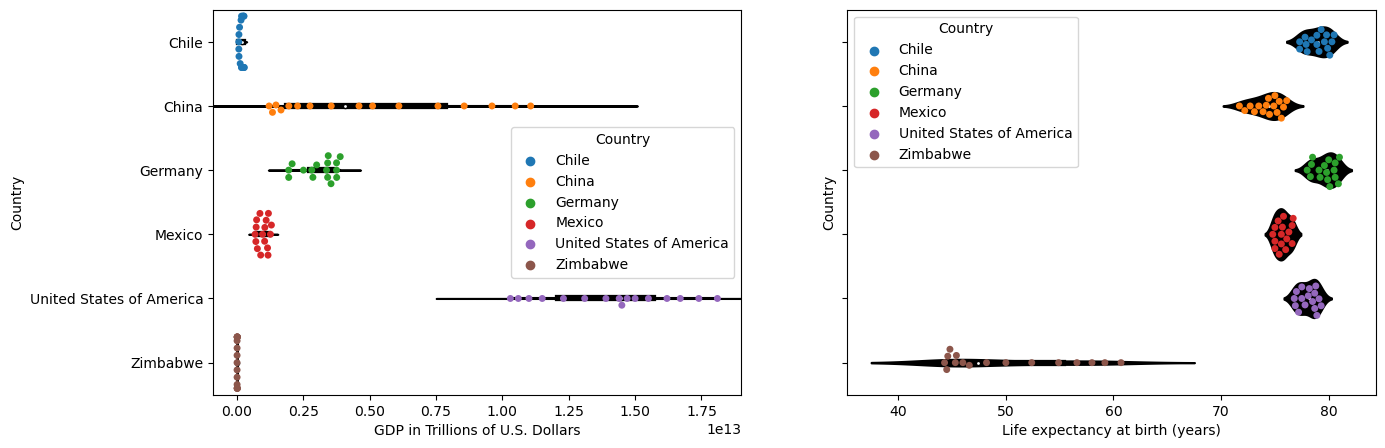

In [70]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 5))
axes[0] = sns.violinplot(ax = axes[0], x = df.GDP, y = df.Country, color = "black")
axes[0] = sns.swarmplot(ax = axes[0], x = df.GDP, y = df.Country, hue = df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax = axes[1], x = df.LEABY, y = df.Country, color = "black")
axes[1] = sns.swarmplot(ax = axes[1], x = df.LEABY, y = df.Country, hue = df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

#### Line Charts

We will now investigate the changes and trends in `GDP` and `LEABY` over the years through a series of line charts.

Below we have separated the countries by colour and can see that the US and China have seen substantial gains from 2000 to 2015.

China saw its `GDP` grow from less than a quarter of a trillion dollars to one trillion dollars within this time frame.

The remainder of the coutries did not see increases in `GDP` of this magnitude.

/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

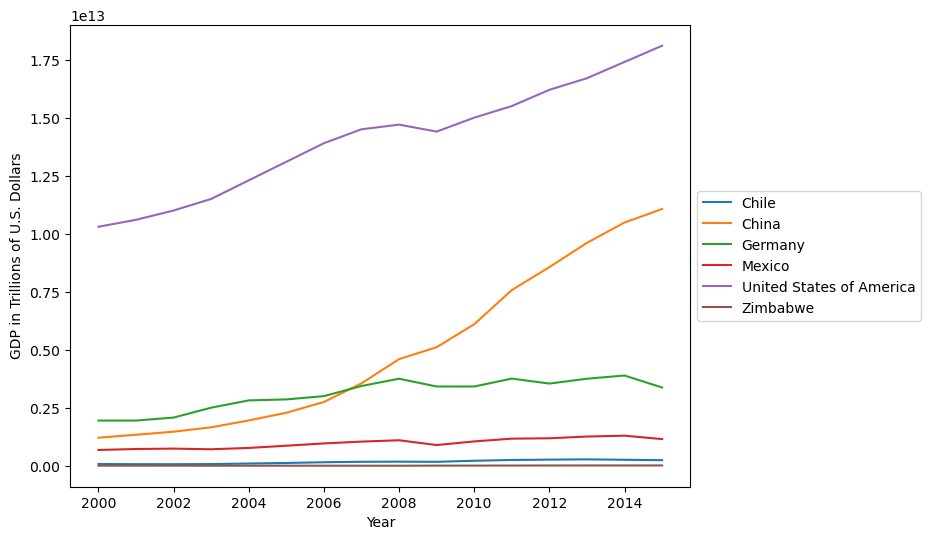

In [73]:
plt.figure(figsize=(8, 6))
sns.lineplot(x = df.Year, y = df.GDP, hue = df.Country)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.ylabel("GDP in Trillions of U.S. Dollars")

To allow for more effective comparisons in `GDP` by country, faceted line charts were produced.

In the individual plots, each country has its own y-axis which allows the shape of each countries `GDP` to be compared without the same scale. With this in mind we can more easily see that all of the countries have seen increases.

In the chart above when compared to the US and China, other countries `GDP` looked insignificant, however all of the countries experienced growth from the year 2000 onward.

/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

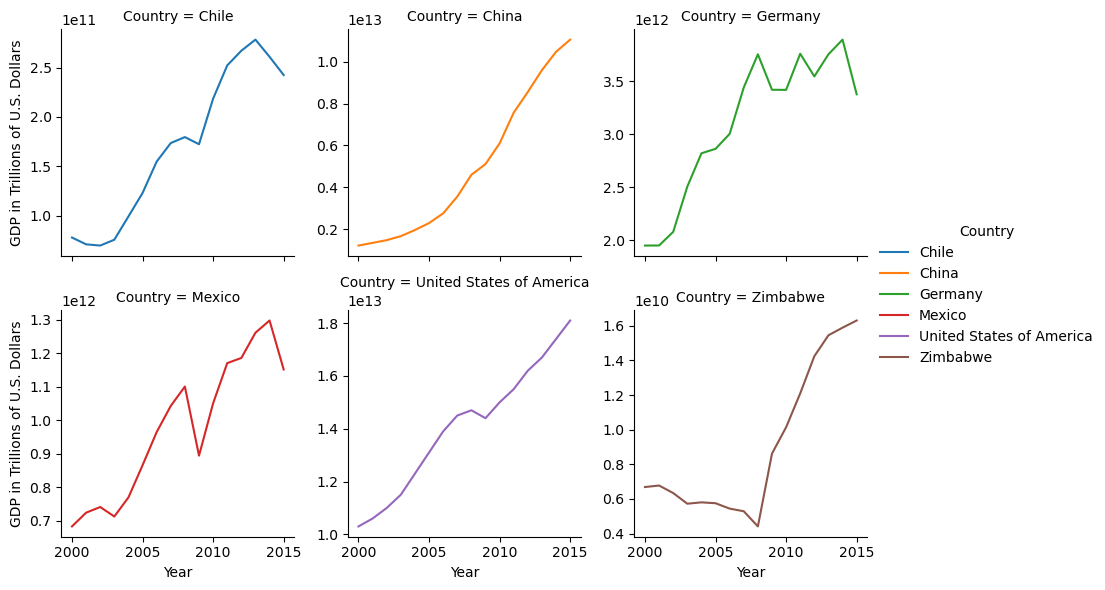

In [75]:
facetedLineChartGDP = sns.FacetGrid(df, col = "Country", col_wrap = 3,
                                  hue = "Country", sharey = False)
facetedLineChartGDP = (facetedLineChartGDP.map(sns.lineplot, "Year", "GDP")
                       .add_legend()
                       .set_axis_labels("Year", "GDP in Trillions of U.S. Dollars"))

We will now investigate the changes in life expectancy over the years. We can see from the chart below that all of the countries have experienced an increase in their life expectancy, however Zimbabwe has seen the greatest increase after a slight dip around 2004.

/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Life Expectancy at Birth (Years)')

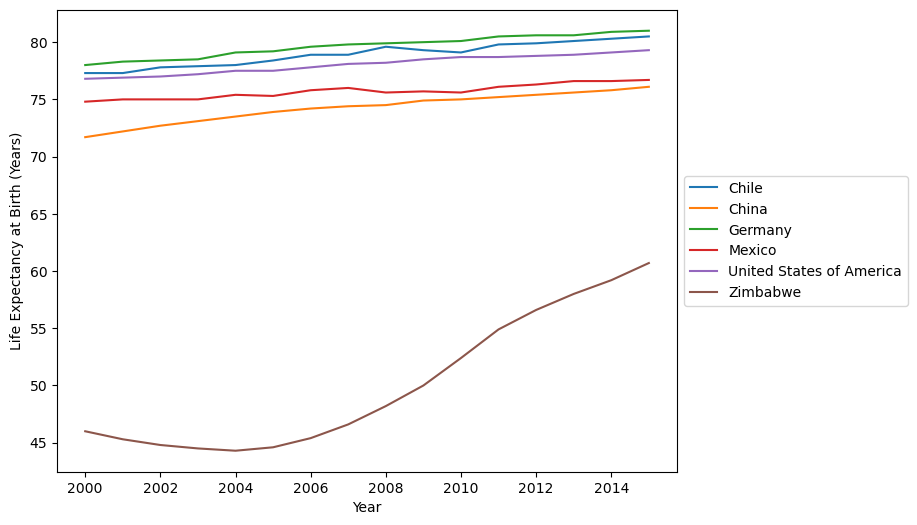

In [76]:
plt.figure(figsize=(8, 6))
sns.lineplot(x = df.Year, y = df.LEABY, hue = df.Country)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.ylabel("Life Expectancy at Birth (Years)")

Once again to allow for more effective comparisons we have created faceted line charts this time of the `LEABY` by Country.

We can see that Chile and Mexico experienced dips in their `LEABY` around the same time which could offer an opportunity for further investigation to identify the cause of this dip.

This type of plotting is once again useful as it prevents nuances of the data being lost as they were when a single y-axis was shared among the countries.

Additionally we can see that the seeminly linear changes shown above were in reality far less smooth for some of the countries.

/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/grow1ey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

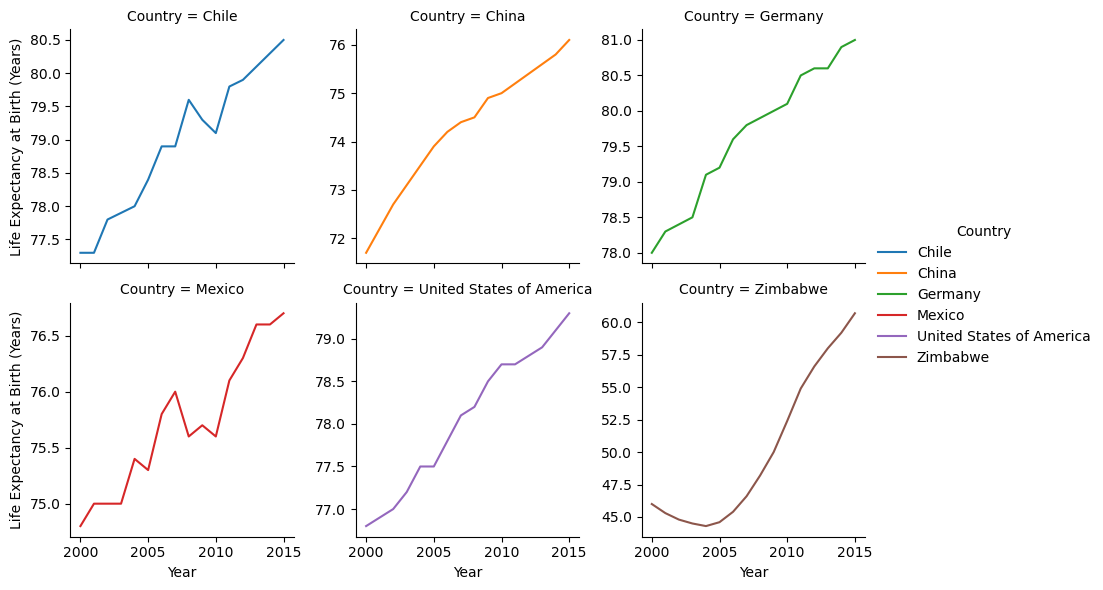

In [77]:
facetedLineChartLEABY = sns.FacetGrid(df, col = "Country", col_wrap = 3,
                                      hue = "Country", sharey = False)
facetedLineChartLEABY = (facetedLineChartLEABY.map(sns.lineplot, "Year", "LEABY")
                       .add_legend()
                       .set_axis_labels("Year", "Life Expectancy at Birth (Years)"))

#### Scatter Plot


In our next two charts we will explore the relationship between `GDP` and `LEABY`.

From the chart below we can see that the `GDP` for Zimbabwe is staying flat while their `LEABY` is increasing.

For the other countries they seem to experience a rise in `LEABY` as their `GDP` increases.

Once again the US and China exhibit similar behaviour, as we can see the slopes in their relationship between `GDP` and `LEABY` are equivalent.

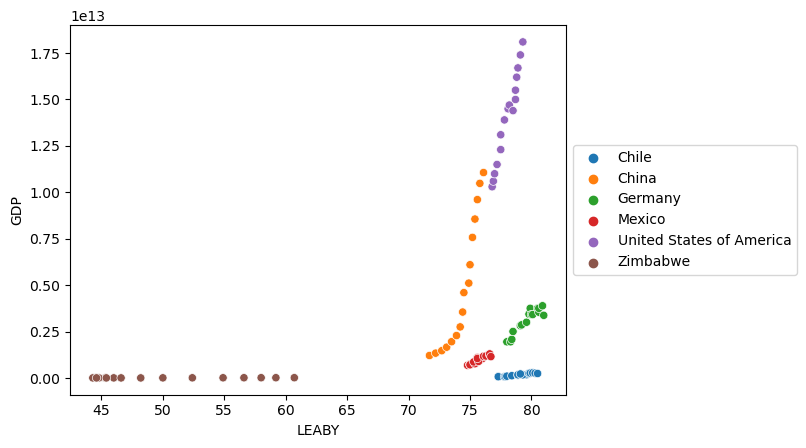

In [80]:
sns.scatterplot(data = df, x = df.LEABY, y = df.GDP, hue = "Country").legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)

We will once again make use of faceted line charts to better compare the relationship between `GDP` and `LEABY` for each country.

Reviewing the individual countries we can see that most countries like the US, Mexico and Zimbabwe have linear relationships between `GDP` and `LEABY`.

On the other hand China's relationship between `GDP` and `LEABY` follows more of an exponential curve and Chile's is more logarithmic.

In general we can see that all of the countries show an increase in `GDP` and `LEABY`, thus exhibiting a positive correlation.

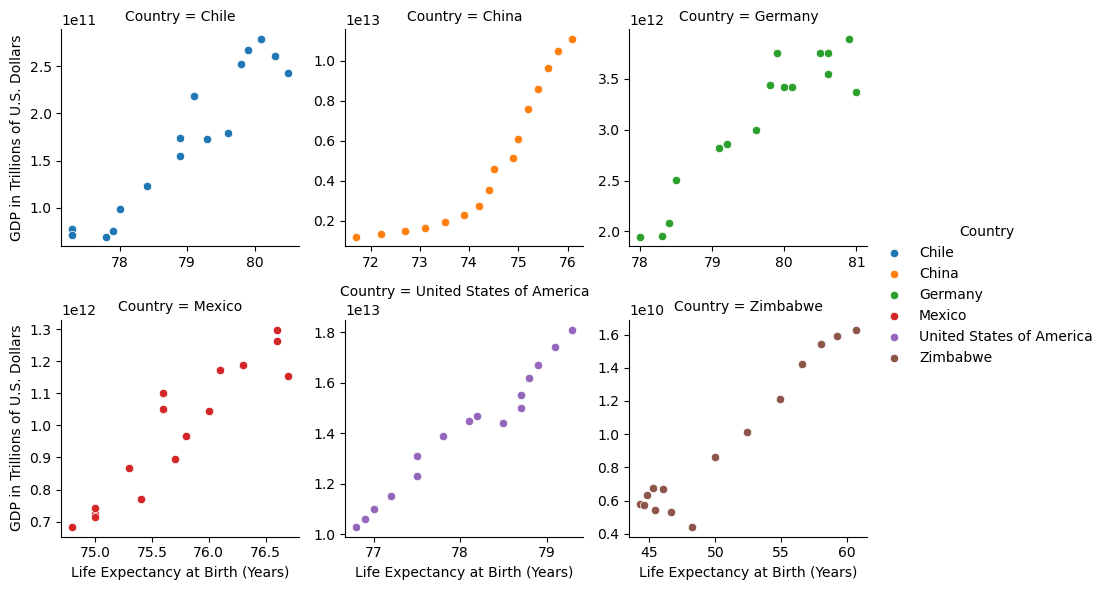

In [85]:
facetedLineChartsGDPLEABY = sns.FacetGrid(df, col = "Country", col_wrap = 3,
                                          hue = "Country", sharex= False, sharey = False)
facetedLineChartsGDPLEABY = (facetedLineChartsGDPLEABY.map(sns.scatterplot, "LEABY", "GDP")
                            .add_legend()
                            .set_axis_labels("Life Expectancy at Birth (Years)", "GDP in Trillions of U.S. Dollars"))

#### Conclusions

Within this project we were able to make several data visualisations despite the relatively small dataset, containing only 96 rows and 4 columns.

We were also able to answer all of the questions posited at the beginning of the project:

* How has life expectancy changed over time in each of the six nations?
    - In each of the six nations life expectancy at birth in years has increased over time with Zimbabwe showing the greatest increase.
* What are the GDP growth trends in these countries over the same period?
    - The GDP experienced an increase for all of the countries over the same time period, with China showing the most significant increase.
* Is there a significant correlation between a country’s GDP and its average life expectancy?
    - Yes there is a significant positive correlation between a country's GDP and its average life expectancy at birth in years for all of the countries within the dataset.
* What are the average life expectancies across the nations?
    - The average life expectancy at birth in years was around the mid to high 70s for all countries expect for Zimbabwe which exhibited a value around 50.
* How is life expectancy distributed within and across countries?
    - The distribution of `LEABY` in the data is very left skewed with most of the values collected on the right-hand side.